# <center>CITS5508 Machine Learning - Lab Sheet 4</center>

**Name: Isaac Huang  
Student ID: 23019722  
File name: lab04.ipyn**

## Contents of Project 1:
1. [Import Necessary Libraries](#1)
2. [Read In and Explore the Concrete Slump Dataset](#2)
3. [Data Visualisation and Outliers](#3)
4. [Data Split and Feature Scaling](#4)
5. [Base Estimators Training](#5)
6. [Voting Regressor](#6)
7. [Conclusion of Project 1](#7)

## Contents of Project 2:
8. [Read in and Explore the Abalone Dataset](#8)
9. [Data Visualisation and Cleaning](#9)
10. [Data Split and Feature Scaling](#10)
11. [Random Forest Regressor](#11)
12. [Bagging Regressor](#12)
13. [Conclusion of Project 2](#13)

## Concrete Slump Dataset Information:
Input variables (kg / m^3):
- Cement
- Slag : Increases strength and durability of concrete.
- Fly ash : Increases strength and durability of concrete.
- Water
- SP: Superplasticizer, that enable the production of concrete with approximately 15% less water content.
- Coarse Aggr.: Particles that retain on 4.75 mm sieve.
- Fine Aggr.: Particles that pass through 4.75 mm sieve and retain on 0.075 mm sieve.

Output variables:
- SLUMP (cm)
- FLOW (cm)
- 28-day Compressive Strength (Mpa): The ability of material or structure to carry the loads on its surface without any crack or deflection.         

## Abalone Dataset Information:
**From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).** 

Predicting the age of abalone from physical measurements as the following attributes:
<table>
    <thead>
        <tr>
            <th>Name</th>
            <th>Data Type</th>
            <th>Meas.</th>
            <th>Description</th>
        </tr>
        <tbody>
            <tr><td>Sex</td>		    <td>nominal</td>	<td></td>		        <td>M, F, and I (infant)</td></tr>
	<tr><td>Length</td>		    <td>continuous</td>	<td>mm</td>	    <td>Longest shell measurement</td></tr>
	<tr><td>Diameter</td>	    <td>continuous</td>	<td>mm</td>	    <td>perpendicular to length</td></tr>
	<tr><td>Height</td>		    <td>continuous</td>	<td>mm</td>	    <td>with meat in shell</td></tr>
	<tr><td>Whole weight</td>	<td>continuous</td>	<td>grams</td>	<td>whole abalone</td></tr>
	<tr><td>Shucked weight</td>	<td>continuous</td>	<td>grams</td>	<td>weight of meat</td></tr>
	<tr><td>Viscera weight</td>	<td>continuous</td>	<td>grams</td>	<td>gut weight (after bleeding)</td></tr>
	<tr><td>Shell weight</td>	<td>continuous</td>	<td>grams</td>	<td>after being dried</td></tr>
	<tr><td>Rings</td>		    <td>integer</td>	<td></td>       <td>+1.5 gives the age in years</td></tr>
        </tbody>
    </thead>
</table>

<a id='1'></a>
## 1. Import Necessary Libraries   
Importing all the Python libraries needed for project 1, such as numpy, pandas, sklearn, matplotlib and seaborn.

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# visualization
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingRegressor
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor

<a id='2'></a>
## 2. Read in and Explore the Concrete Slump Dataset 
Reading in data file, and using appropriate functions to display and explore the attributes.
- We can see there are 103 instances and 11 variable, including 1 index column, 7 inputs and 3 outputs. 
- We also have a look at the first 5 instances to have an idea of what each instance looks like.
- Our target variable is the Compressive Strength. The index and the other 2 output columns are to be removed.
- As we have descibed the dataset information at the beginning. I renamed our target column here for better operating and displaying purposes.

In [2]:
con = pd.read_csv('slump_test.data')
print(con.shape)
con.rename(columns = {'Compressive Strength (28-day)(Mpa)':'TargetStrength'}, inplace = True)
con.head()

Results on the test set:
(103, 11)


,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),TargetStrength
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [6]:
for name in con.head(0):
    if "cm" in name or "No" in name:
        del con[name]

con.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,TargetStrength
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,26.82


### 2.1 Observations of the Concrete Slump Data   
Having a look at the data type, max, min, mean, standard deviation of each columns.
- Data are all numerical in floats, no categorical data.
- There are no missing or dplicated data.
- Attributes 'Slag' and 'Fly ash' have zero values.
- As in concrete mix ratio, it is normal to have zero slag or zero fly ash to attain the mixture the user wants, I am not going to treat them as missing values.
- However, if the zero values affect our training process or log transformation later on, I will do something with them.

In [7]:
con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cement          103 non-null    float64
 1   Slag            103 non-null    float64
 2   Fly ash         103 non-null    float64
 3   Water           103 non-null    float64
 4   SP              103 non-null    float64
 5   Coarse Aggr.    103 non-null    float64
 6   Fine Aggr.      103 non-null    float64
 7   TargetStrength  103 non-null    float64
dtypes: float64(8)
memory usage: 6.6 KB


In [8]:
con.isnull().sum()

Cement            0
Slag              0
Fly ash           0
Water             0
SP                0
Coarse Aggr.      0
Fine Aggr.        0
TargetStrength    0
dtype: int64

In [9]:
con.duplicated().sum()

0

In [10]:
display(con.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
Cement,103.0,229.894175,78.877230,137.00,152.00,248.00,303.900,374.00
Slag,103.0,77.973786,60.461363,0.00,0.05,100.00,125.000,193.00
Fly ash,103.0,149.014563,85.418080,0.00,115.50,164.00,235.950,260.00
Water,103.0,197.167961,20.208158,160.00,180.00,196.00,209.500,240.00
SP,103.0,8.539806,2.807530,4.40,6.00,8.00,10.000,19.00
Coarse Aggr.,103.0,883.978641,88.391393,708.00,819.50,879.00,952.800,1049.90
Fine Aggr.,103.0,739.604854,63.342117,640.60,684.50,742.70,788.000,902.00
TargetStrength,103.0,36.039417,7.838232,17.19,30.90,35.52,41.205,58.53


In [11]:
con[con == 0].count(axis=0)

Cement             0
Slag              26
Fly ash           20
Water              0
SP                 0
Coarse Aggr.       0
Fine Aggr.         0
TargetStrength     0
dtype: int64

<a id='3'></a>
## 3. Data Visualisation & Outliers
### 3.1 Outliers
- From the boxplots and scatterplot below, attriubte 'SP' may contain possible outliers.   
- However, we only have 103 instances from this dataset, and we will have to split them into training and test sets. The cost may be too high to remove those outliers here.

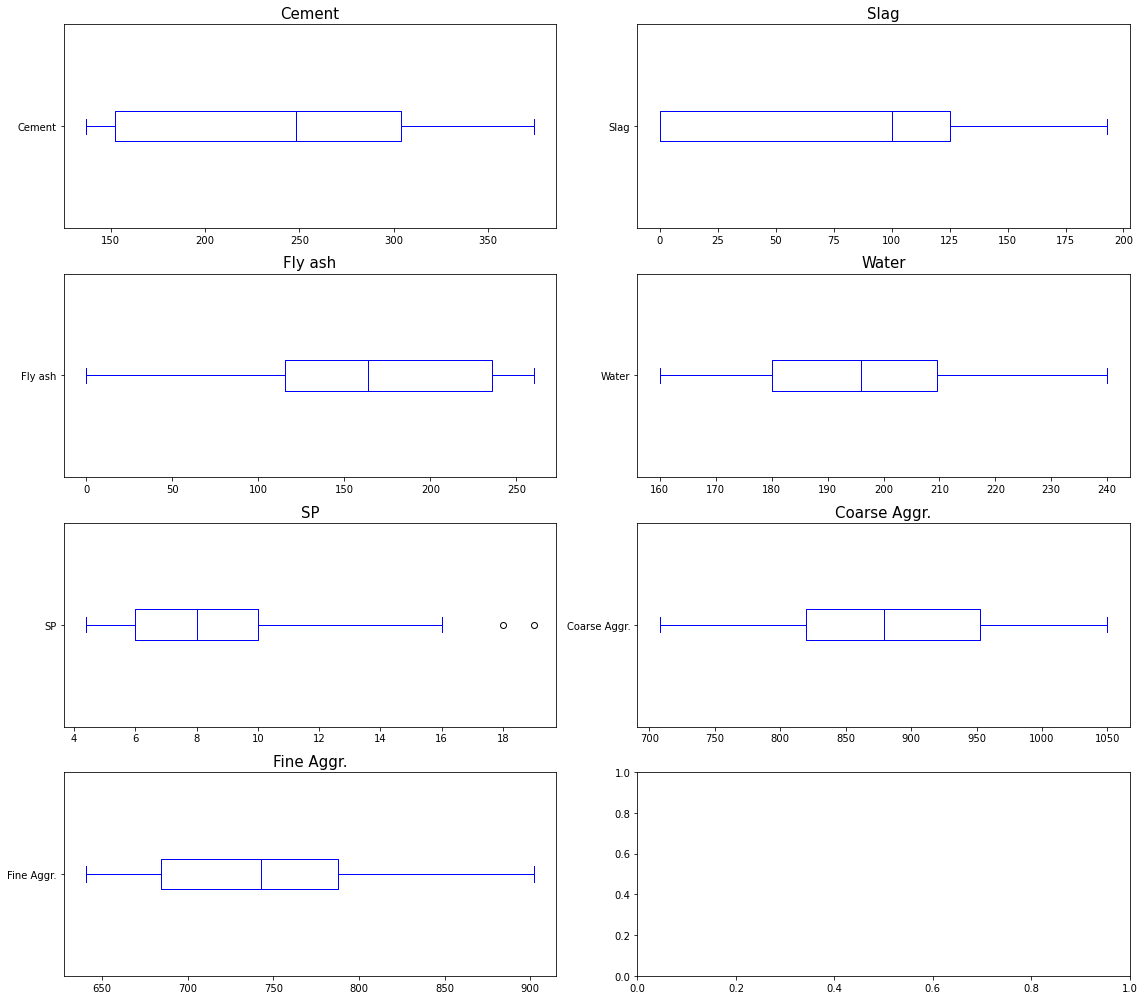

In [12]:
X = con.iloc[:, :-1]
y = con.iloc[:, -1]
features = con.columns[:-1]

fig, axes = plt.subplots(4,2,figsize=(16, 14))
axes = np.ravel(axes)

for i, c in enumerate(X):
    hist = con[c].plot(kind = 'box', ax=axes[i],color='blue', vert=False)
    axes[i].set_title(c, fontsize=15)
    
plt.tight_layout()
plt.show()

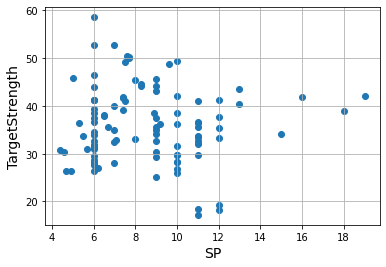

In [13]:
plt.scatter(x = con['SP'], y = con['TargetStrength'],)
plt.xlabel('SP', fontsize=14)
plt.ylabel('TargetStrength', fontsize=14)
plt.grid(True)
plt.show()

### 3.2 Observation
- From the heatmap below, none of the attributes seem to be highly correlated.
- From the scatterplots and heatmap below, we can see ,apart from 'Cement' and 'Fly ash', all the other attributes don't seem to have obvious correlation with our target column.
- From the scatter matrix below, we can see some bimodal distributions, as 'Cement', 'Slag' and 'Fly ash' are allowed to have zero content or be substituted by one or the other two in the concrete mix ratio.

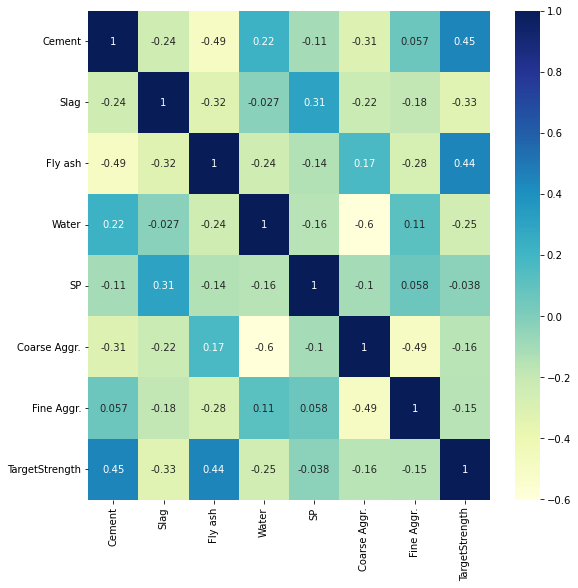

In [14]:
fig=plt.figure(figsize=(9,9))
sns.heatmap(con.corr(),annot=True,cmap='YlGnBu')
plt.show()

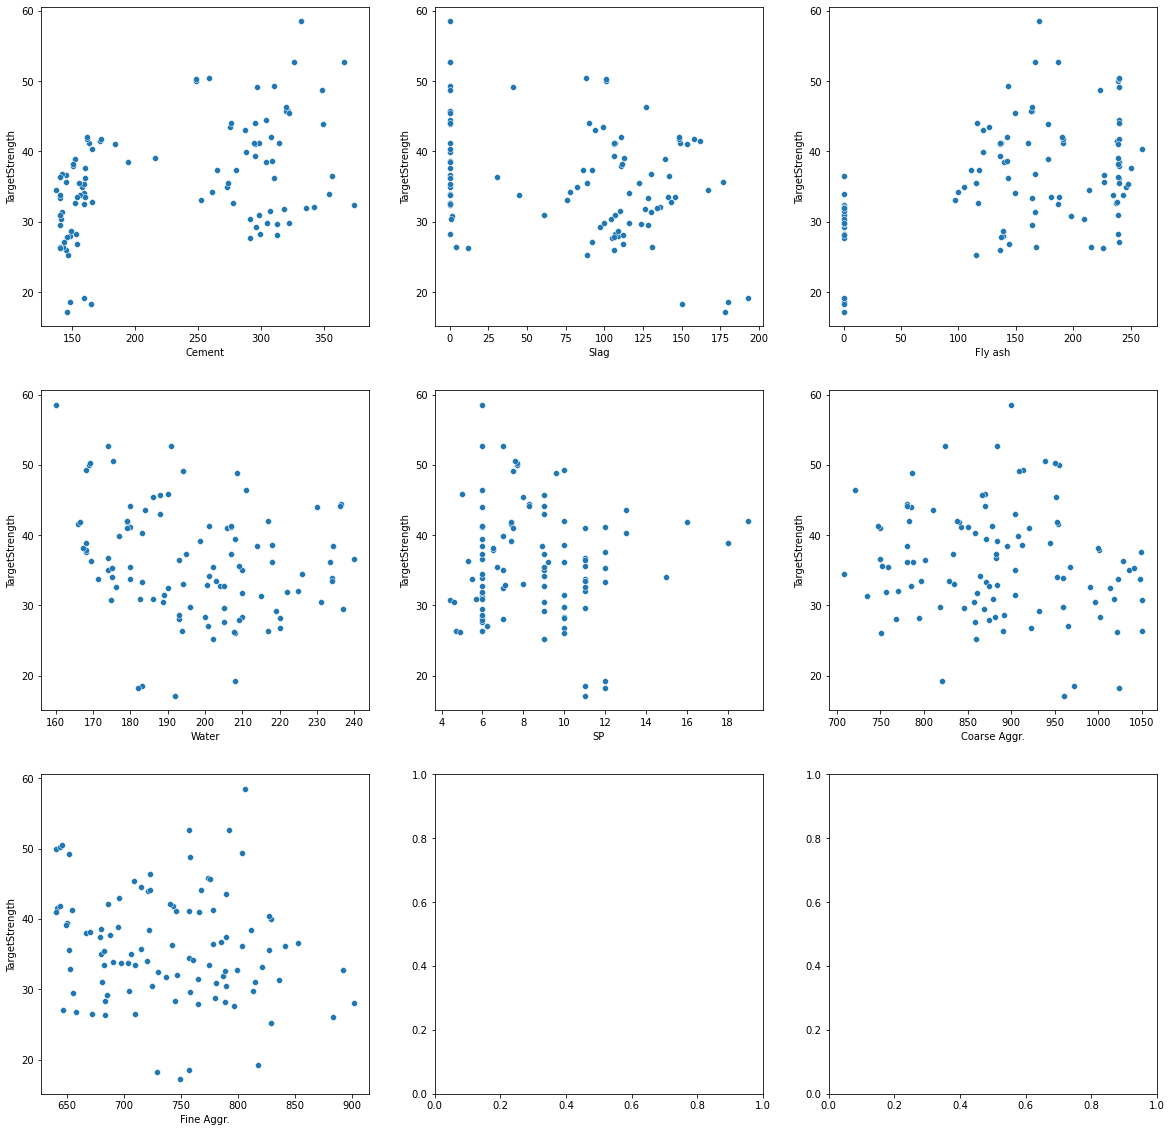

In [15]:
fig, axs = plt.subplots(3, 3, figsize = (20,20))

for i in range(0, 7):
    sns.scatterplot(x=features[i], y='TargetStrength', data=con, ax=axs[i//3, i%3])

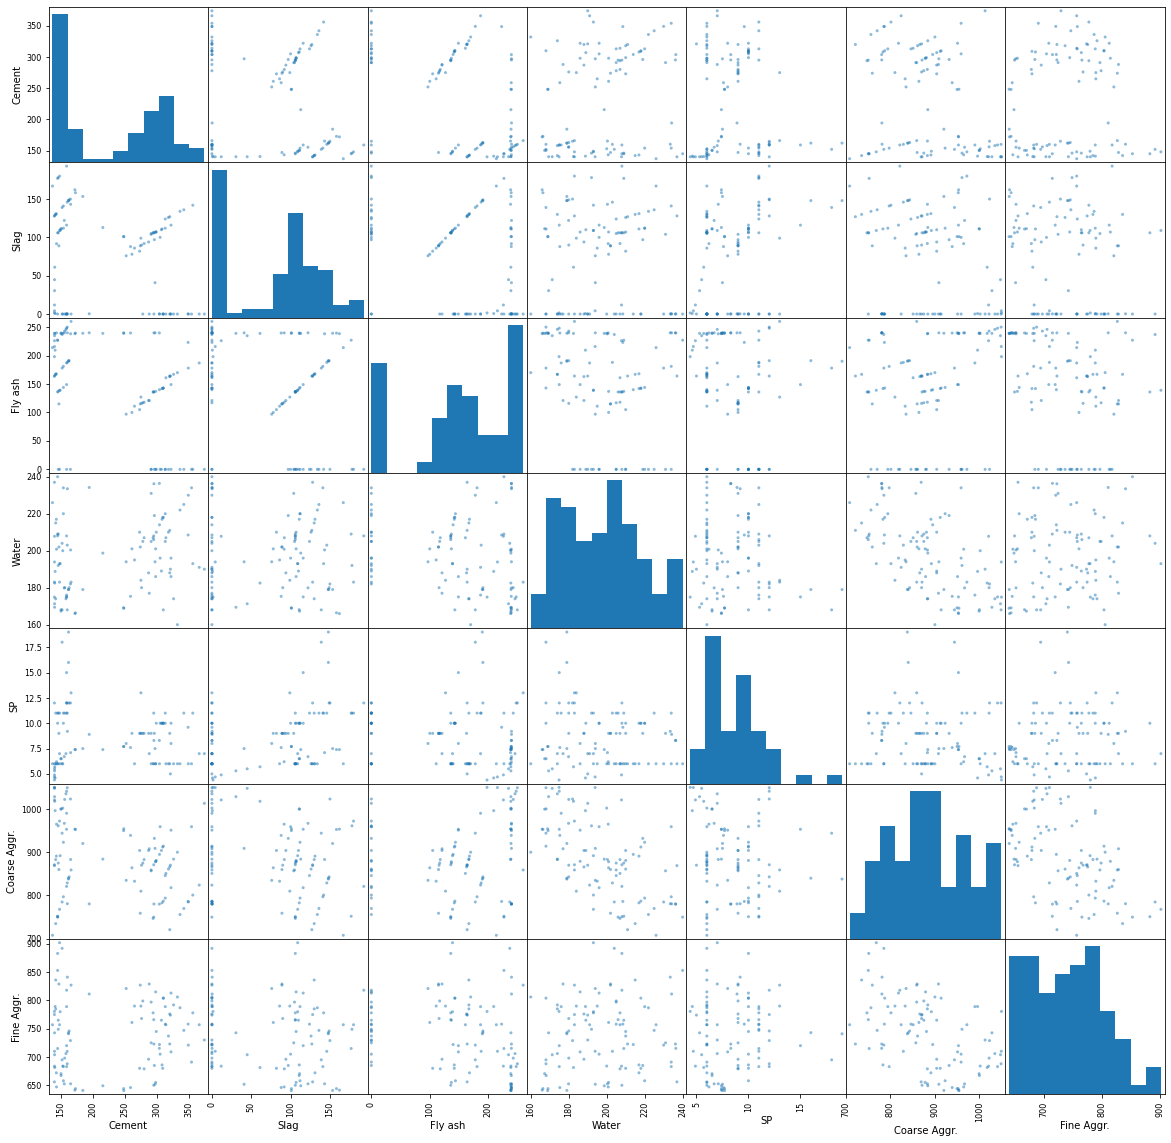

In [16]:
scatter_matrix(con[features], figsize=(20.0,20.0))
plt.show()

<a id='4'></a>
## 4. Data Split and Feature Scaling
- We performed 80/20 random split on the dataset here to form a training set and a test set.
- We perfromed MinMaxScaler here, as many of the attributes are not normally distributed from the scatter matrix we've seen above.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=17)
X_test.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.
33,274.0,89.0,115.0,202.0,9.0,759.0,827.0
74,146.0,106.0,137.0,209.0,6.0,875.0,765.0
73,294.0,106.0,136.0,207.0,6.0,747.0,778.0
9,304.0,0.0,140.0,214.0,6.0,895.0,722.0
40,145.0,177.0,227.0,209.0,11.0,752.0,715.0


In [18]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

<a id='5'></a>
## 5. Base Estimators Training
- Tuning our base estimators with GridSearch to find good hyperparameter combinations.
- All the testing scores are close to their training scores. We don't seem to have overfitting or underfitting problems here.
- I wrote a function 'plot_predictions' to produce RMSEs and scatter plots of predicted values versus the ground truth values, and it will be used for all the models in this lab sheet.    


### 5.1 Linear SVM Regressor

In [40]:
lsvr = LinearSVR(random_state=24)

param_1 = {
    'max_iter': [300, 500, 1000, 1500],
    'C': [1, 5, 10, 13, 15, 17, 20]
}

model_1 = GridSearchCV(lsvr, param_1, cv=3, n_jobs=-1)
model_1.fit(X_train, y_train.values.ravel())
print ('Best Hyperparameter Combination: {}\n'.format(model_1.best_params_))
model_1.score(X_train, y_train)

Best Hyperparameter Combination: {'C': 17, 'max_iter': 1000}



0.8897877177975283

In [41]:
model_1.score(X_test, y_test)

0.8718719579674243

In [42]:
def plot_predictions(y_test, predicted_y, title):
    
    fig, ax = plt.subplots(figsize=(8, 8))
    
    rms = np.sqrt(mean_squared_error(y_test, predicted_y))
    s=round(y_test.describe()[3]-rms)
    t=round(y_test.describe()[7]+rms)
    u=t-s
    
    ax.set_xlim(s, t)
    ax.set_ylim(s, t)
    
    ax.plot(y_test, predicted_y, '.r')
    ax.plot([s, t], [s, t], '--g')
    ax.plot([s, t], [s+rms, t+rms], ':b')
    ax.plot([s+rms, t+rms], [s, t], ':b')   
    ax.text(1.2*u, 0.6*u,
            "Root Mean Square Error = %.3g" % rms,
            ha='right', va='bottom')

    ax.set_xlabel('Ground Truth Value', fontsize=14)
    ax.set_ylabel('Predicted Value', fontsize=14)
    plt.title(title, fontsize=14)
    
    return rms

3.0972042669490003


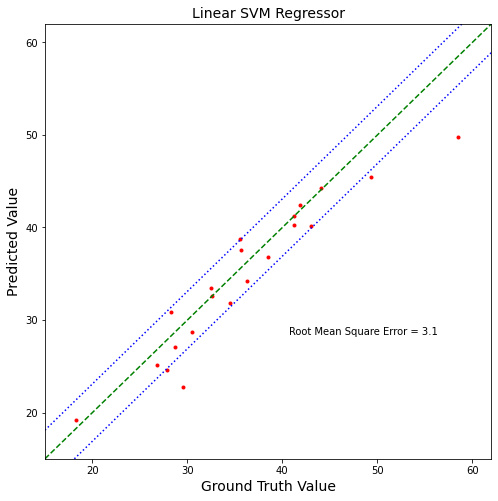

In [43]:
rms1 = plot_predictions(y_test, model_1.predict(X_test), "Linear SVM Regressor")
print(rms1)

### 5.2 Linear Regressor

In [44]:
lr = LinearRegression()
param_2 = {
    'fit_intercept':[True,False]
}

model_2 = GridSearchCV(lr, param_2, cv=3, n_jobs=-1)
model_2.fit(X_train, y_train.values.ravel())
print ('Best Hyperparameter Combination: {}\n'.format(model_2.best_params_))
model_2.score(X_train, y_train)

Best Hyperparameter Combination: {'fit_intercept': True}



0.8990022908010397

In [45]:
model_2.score(X_test, y_test)

0.8827128514493812

2.9632818985103024


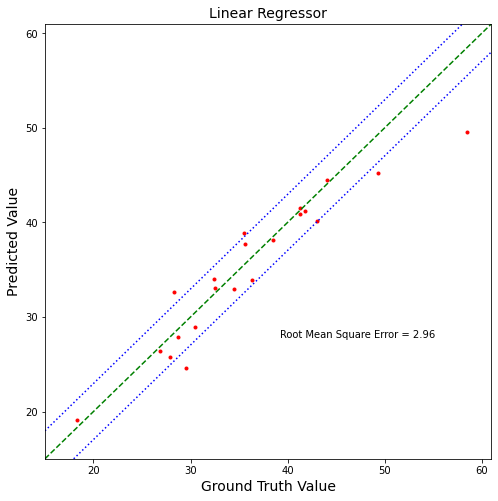

In [46]:
rms2 = plot_predictions(y_test, model_2.predict(X_test), "Linear Regressor")
print(rms2)

### 5.3 Stochastic Gradient Descent Regressor

In [53]:
sgdr = SGDRegressor(random_state=24)

param_3 = {
    'penalty': ['l2', 'l1', 'elasticnet'],
    'max_iter': [500, 1000, 1500, 2000]
}

model_3 = GridSearchCV(sgdr, param_3, cv=3, n_jobs=-1)
model_3.fit(X_train, y_train.values.ravel())
print ('Best Hyperparameter Combination: {}\n'.format(model_3.best_params_))
model_3.score(X_train, y_train)

Best Hyperparameter Combination: {'max_iter': 1000, 'penalty': 'l1'}



0.8886345255095601

In [54]:
model_3.score(X_test, y_test)

0.8558841622232876

3.2847597429700013


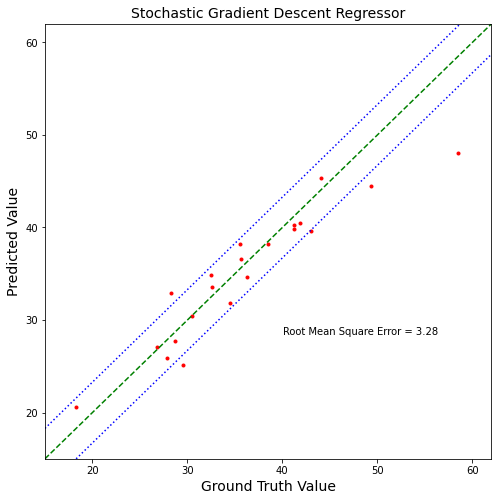

In [55]:
rms3 = plot_predictions(y_test, model_3.predict(X_test), "Stochastic Gradient Descent Regressor")
print(rms3)

<a id='6'></a>
## 6. Voting Regressor
- Training a voting regressor with the 3 base regressors we tuned in the previous section.

In [56]:
r1 = LinearSVR(C=17, max_iter=1000, random_state=24)
r2 = LinearRegression(fit_intercept=True)
r3 = SGDRegressor(max_iter=1000, penalty='l1', random_state=24)
regressors = [('Linear SVR', r1), ('Linear Regression', r2), ('SGD Regressor', r3)]

vr = VotingRegressor(estimators = regressors, n_jobs = -1)
vr.fit(X_train, y_train)

VotingRegressor(estimators=[('Linear SVR', LinearSVR(C=17, random_state=24)),
                            ('Linear Regression', LinearRegression()),
                            ('SGD Regressor',
                             SGDRegressor(penalty='l1', random_state=24))],
                n_jobs=-1)

In [57]:
vr.score(X_train, y_train)

0.8973676371394614

In [58]:
vr.score(X_test, y_test)

0.8751164717626811

3.057738448106441


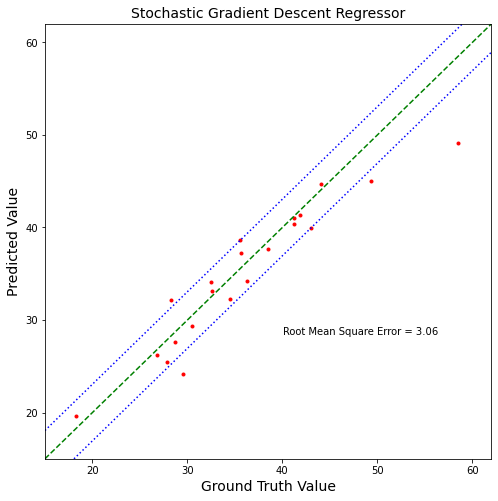

In [59]:
rms4 = plot_predictions(y_test, vr.predict(X_test), "Stochastic Gradient Descent Regressor")
print(rms4)

<a id='7'></a>
## 7. Conclusion of Project 1
- All 4 scatter plots shown above are very similar, which means with this dataset all 4 regressors produced similar predicted values. None of them has overly better or worse predicting ability than the others.
- For this dataset, Linear Regressor performed the best with RMSE≈2.96 and SGDRegressor performed the worst with RMSE≈3.28.
- Voting Regressor averages the predictions from the 3 base estimators and form the final prediction, hence its RMSE ranks the second among our 4 regressors.
- For future or practical uses, if we know some of the base regressors always perform better than the others with concrete datasets, we can give them higher weights to increase Voting Regressor's performance.


In [60]:
models = pd.DataFrame({
    'Model' : ['Linear SVR', 'Linear Regressor', 'SGDRegressor', 'Voting Regressor'],
    'RMSE' : [rms1, rms2, rms3, rms4]
})

models.sort_values(by = 'RMSE', ascending = True)

,Model,RMSE
1,Linear Regressor,2.963282
3,Voting Regressor,3.057738
0,Linear SVR,3.097204
2,SGDRegressor,3.284760


<a id='8'></a>
## 8. Read in and Explore the Abalone Dataset
- As the data file doesn't have a header, we gave the columns a name while reading in the file.
- We can see there are 4177 instances and 9 variable.
- As our goal is to predict the age of abalones, we transferred the column 'Rings' to 'age' by add 1.5 to the values as described in the dataset information.

In [2]:
colnames = ["Sex", "Length", "Diameter", "Height", "WholeWeight", "ShuckedWeight", "VisceraWeight", "ShellWeight", "Rings"]
abalone = pd.read_csv('abalone.data', names=colnames, header=None)
print('This dataset has {} observations with {} variables.'.format(abalone.shape[0], abalone.shape[1]))
abalone.head()

This dataset has 4177 observations with 9 variables.


,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
abalone['age'] = abalone['Rings']+1.5
abalone.drop('Rings', axis = 1, inplace = True)

### 8.1 Observations of The Abalone Data   
Having a look at the data type, max, min, mean, standard deviation of each columns.
- Attribute 'Sex' is in categorical data type. All the others are numerical as floats.
- As mentioned in the dataset description, instances with missing values have been removed, so we can skip this step.
- There are no duplicated instances in this dataset.
- We have zero values in 'Height'. As height cannot be zero, we will have to deal with it.

In [4]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sex            4177 non-null   object 
 1   Length         4177 non-null   float64
 2   Diameter       4177 non-null   float64
 3   Height         4177 non-null   float64
 4   WholeWeight    4177 non-null   float64
 5   ShuckedWeight  4177 non-null   float64
 6   VisceraWeight  4177 non-null   float64
 7   ShellWeight    4177 non-null   float64
 8   age            4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [5]:
abalone.duplicated().sum()

0

In [6]:
abalone.nunique().to_frame("# of unique values")

,# of unique values
Sex,3
Length,134
Diameter,111
Height,51
WholeWeight,2429
ShuckedWeight,1515
VisceraWeight,880
ShellWeight,926
age,28


In [7]:
display(abalone.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
WholeWeight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
ShuckedWeight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
VisceraWeight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
ShellWeight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
age,4177.0,11.433684,3.224169,2.5000,9.5000,10.5000,12.500,30.5000


In [8]:
abalone[abalone == 0].count(axis=0)

Sex              0
Length           0
Diameter         0
Height           2
WholeWeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
age              0
dtype: int64

<a id='9'></a>
## 9. Data Cleaning and Visualisation
### 9.1 Zero Values - Height
- If height is zero, then the abalone doesn't exist, which doesn't make sense. Hence, we replaced the two zero values with the mean of heights.

In [9]:
height_col = abalone['Height']
height_col.replace(to_replace = 0, value = height_col.mean(), inplace=True)

### 9.2 Outliers
- From the boxplots below, we can see many attributes have possible outliers.
- Especially Height and VisceraWeight have extreme outliers.
- SVM, which we are going to use, is sensitive to outliers. Therefore, we at least remove the extreme outliers here.
- We will see how the training turns out to decide if we need to examine further to remove more outliers.

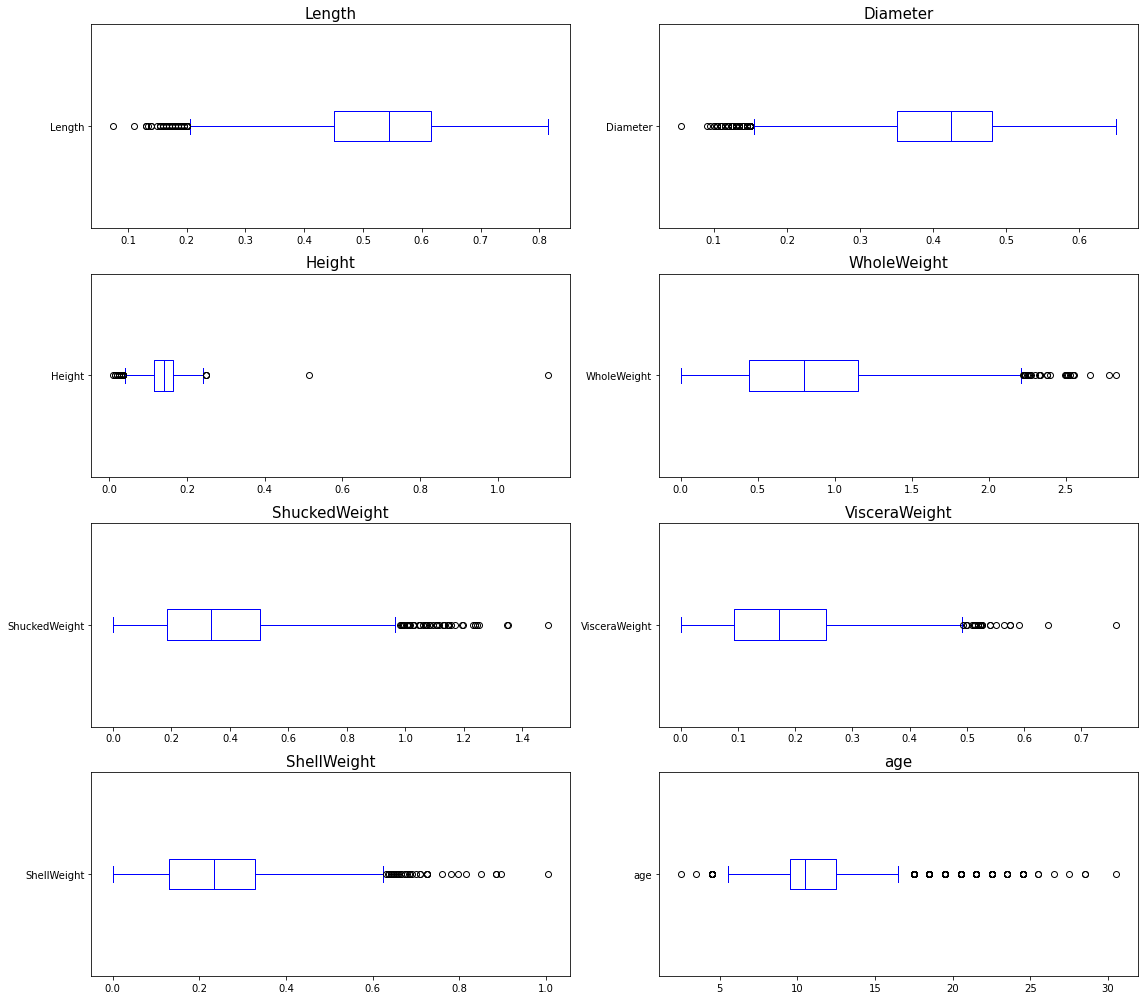

In [10]:
Z = abalone.iloc[:, 1:]
fig, axes = plt.subplots(4,2,figsize=(16, 14))
axes = np.ravel(axes)

for i, c in enumerate(Z):
    hist = abalone[c].plot(kind = 'box', ax=axes[i],color='blue', vert=False)
    axes[i].set_title(c, fontsize=15)
    
plt.tight_layout()
plt.show()

In [11]:
idx = abalone.loc[abalone['Height']>0.4].index
abalone.drop(idx, inplace=True)

idx = abalone.loc[abalone['VisceraWeight']>0.6].index
abalone.drop(idx, inplace=True)

### 9.3 Categorical Attribute - Sex
The attribute, Sex, can still be useful for our model training for the reasons below, so we kept it for now but transferred it into numerical data ("M":1, "I":0, "F":-1).
- From the 2 plots, we can see the numbers of categories of 'Sex' are quite balanced.
- Both male and female have similar mean and similar data distribution.
- The main age of infants are right under the main age of males and females.

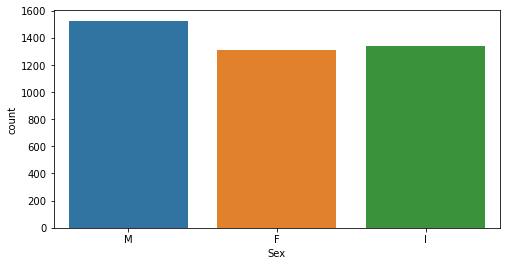

In [12]:
plt.figure(figsize=(8,4))
sns.countplot(x='Sex', data=abalone)
plt.show()

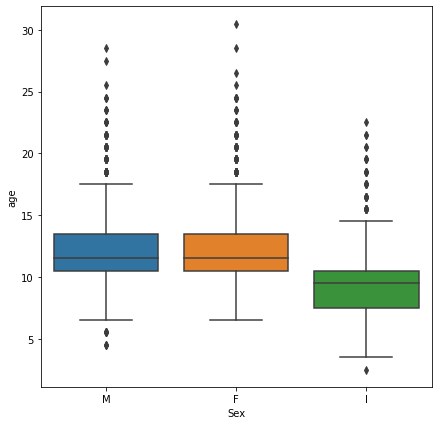

In [13]:
plt.figure(figsize=(7, 7))
sns.boxplot(data=abalone, x='Sex', y='age')
plt.show()

In [14]:
abalone.Sex = abalone.Sex.replace({"M":1, "I":0, "F":-1})
abalone.sample(10)

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,age
2498,1,0.495,0.400,0.140,0.7775,0.2015,0.1800,0.2500,16.5
147,0,0.280,0.205,0.080,0.1270,0.0520,0.0390,0.0420,10.5
2094,0,0.405,0.305,0.090,0.2825,0.1140,0.0575,0.0950,8.5
1345,1,0.585,0.475,0.150,1.0650,0.5315,0.1990,0.2885,11.5
3643,0,0.470,0.345,0.120,0.3685,0.1525,0.0615,0.1250,9.5
3859,-1,0.570,0.440,0.190,1.0180,0.4470,0.2070,0.2650,10.5
653,1,0.310,0.225,0.080,0.1345,0.0540,0.0240,0.0500,8.5
3309,0,0.485,0.355,0.120,0.5085,0.2100,0.1220,0.1350,10.5
665,-1,0.395,0.295,0.095,0.2245,0.0780,0.0540,0.0800,11.5
145,-1,0.490,0.380,0.125,0.5490,0.2450,0.1075,0.1740,11.5


### 9.4 Attribute Correlations
- From the scatter mattrix, we can see 'Length' and 'Diameter' are almost linearly correlated.
- Heatmap shows very high correlation among the attributes which could result in multicollinearity.
- 'Whole Weight' is almost linear aligned with all the other attributes.
- 'Height' has the least linearity with other attributes.
- 'Shell Weight' is mostly correlated to the 'Age'.
- 'Shucked Weight' is least correlated to the 'Age'.

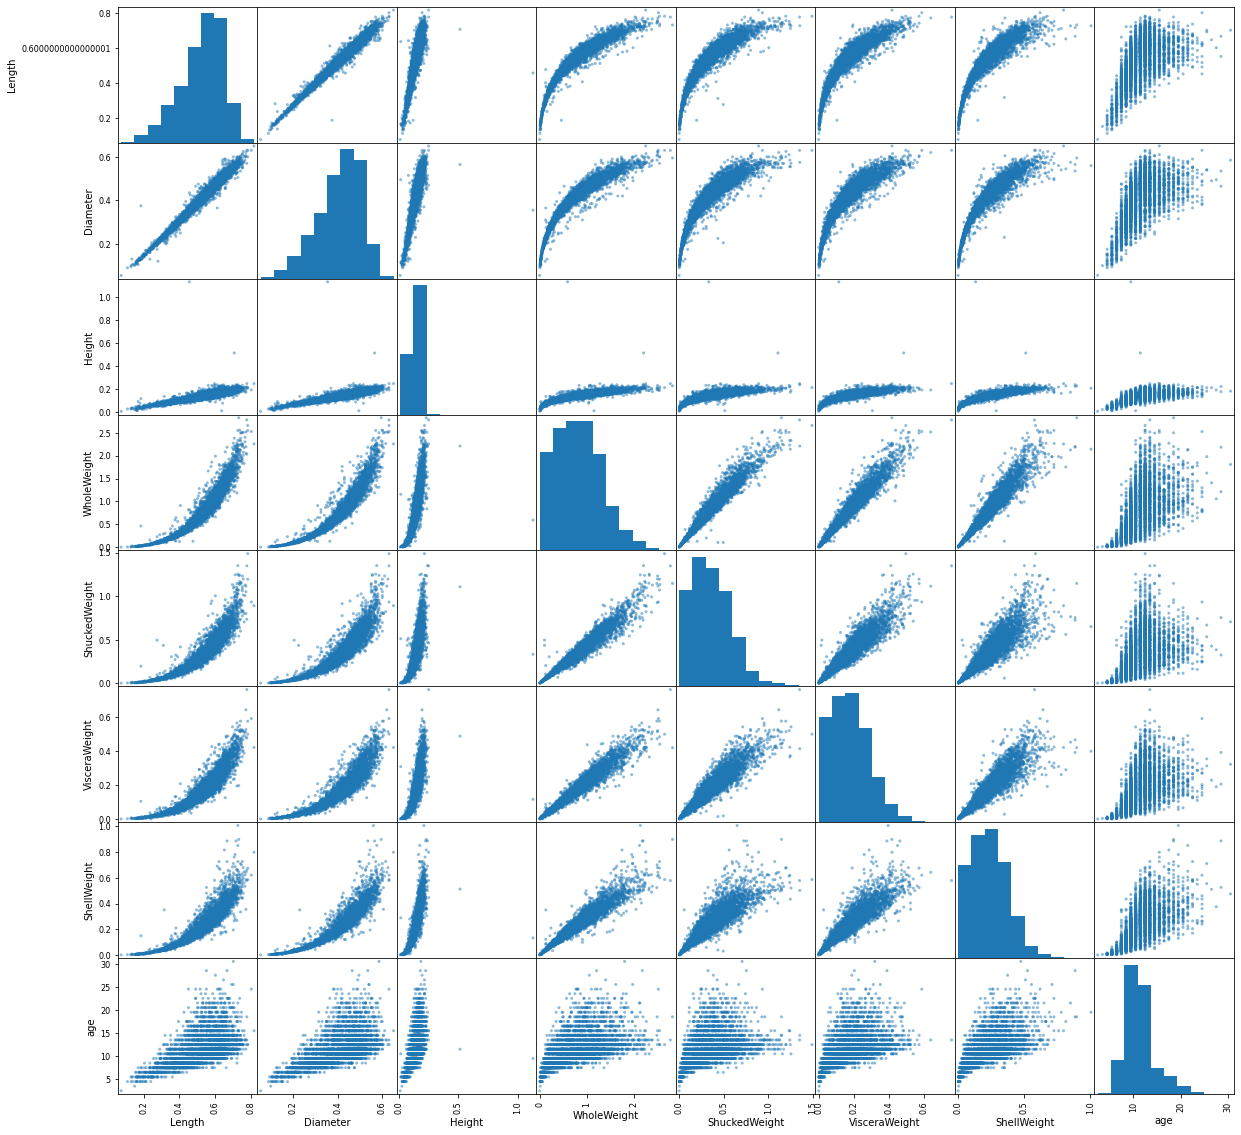

In [15]:
scatter_matrix(Z, figsize=(20.0,20.0))
plt.show()

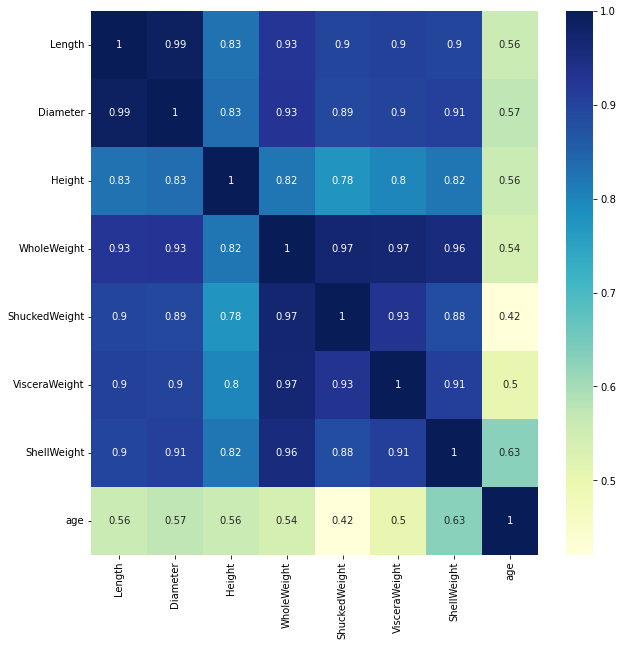

In [16]:
fig=plt.figure(figsize=(10, 10))
sns.heatmap(Z.corr(),annot=True,cmap='YlGnBu')
plt.show()

<a id='10'></a>
## 10. Data Split and Feature Scaling
- We performed 85/15 random split on the dataset here to form a training set and a test set.
- In the dataset description, this dataset has alreadt been scaled, so we skipped scaling step here.

In [17]:
A = abalone.iloc[:, :-1]
b = abalone.iloc[:, -1]
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size = 0.15, random_state=7)

<a id='11'></a>
## 11. Random Forest Regressor
- We set bootstrap=True in all the ensembling learning models in project 2.
- There are only 2 more common hyperparameters, 'max_features' and 'max_samples, in both RandomForestRegressor and BaggingRegressor. 
- From the plots above, we know there is multicollinearity problem in this dataset. From the training and testing scores below, we can see there is an overfitting problem here.

In [18]:
rfr = RandomForestRegressor(n_estimators=500, random_state=47)

param_5 = {
        'max_features': [5, 6, 7, 8],
        'max_samples': [0.4, 0.6, 0.8, 1],
} 
model_5 = GridSearchCV(rfr, param_5, cv = 3, n_jobs = -1)
model_5.fit(A_train, b_train.values.ravel())
print ('Best Hyperparameter combination: {}\n'.format(model_5.best_params_))
model_5.score(A_train, b_train)

Best Hyperparameter combination: {'max_features': 6, 'max_samples': 0.4}



0.8000851913488628

In [19]:
TS5 = model_5.score(A_test, b_test)
print(TS5)

0.5928008347320515


In [20]:
def plot_predictions_round(y_test, predicted_y, title):
    
    fig, ax = plt.subplots(figsize=(8, 8))
    
    rms = np.sqrt(mean_squared_error(y_test, np.round(predicted_y)))
    s=round(y_test.describe()[3]-rms)
    t=round(y_test.describe()[7]+rms)
    u=t-s
    
    ax.set_xlim(s, t)
    ax.set_ylim(s, t)
    
    ax.plot(y_test, predicted_y, '.r')
    ax.plot([s, t], [s, t], '--g')
    ax.plot([s, t], [s+rms, t+rms], ':b')
    ax.plot([s+rms, t+rms], [s, t], ':b')   
    ax.text(0.9*u, 0.2*u,
            "Root Mean Square Error = %.3g" % rms,
            ha='right', va='bottom')

    ax.set_xlabel('Ground Truth Value', fontsize=14)
    ax.set_ylabel('Predicted Value', fontsize=14)
    plt.title(title, fontsize=14)
    
    return rms

2.193695584963606


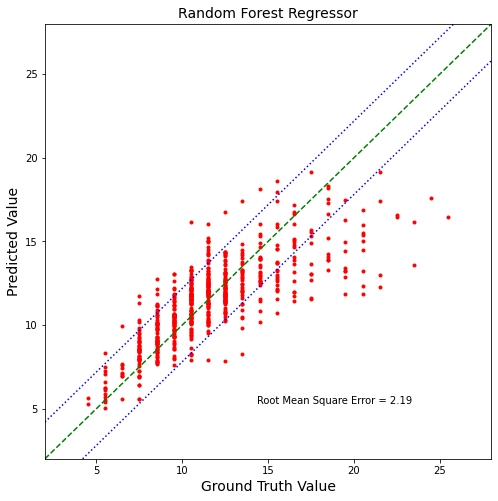

In [30]:
rms5 = plot_predictions_round(b_test, model_5.predict(A_test), "Random Forest Regressor")
print(rms5)

In [31]:
def prediction_error(y_test, predicted_y, title):
    
    pre_error = predicted_y - y_test
    diff = pd.DataFrame(np.array(y_test), columns=['Ground truth'])
    diff = pd.concat([diff, pd.DataFrame(predicted_y,columns=['Predicted value'])],axis=1)
    diff = pd.concat([diff, pd.DataFrame(np.array(pre_error),columns=['Difference'])],axis=1)

    avg_pre_error = diff.groupby(['Ground truth'])['Difference'].mean()
    avg_pre_error.plot.bar(figsize=(20,5), title=title);

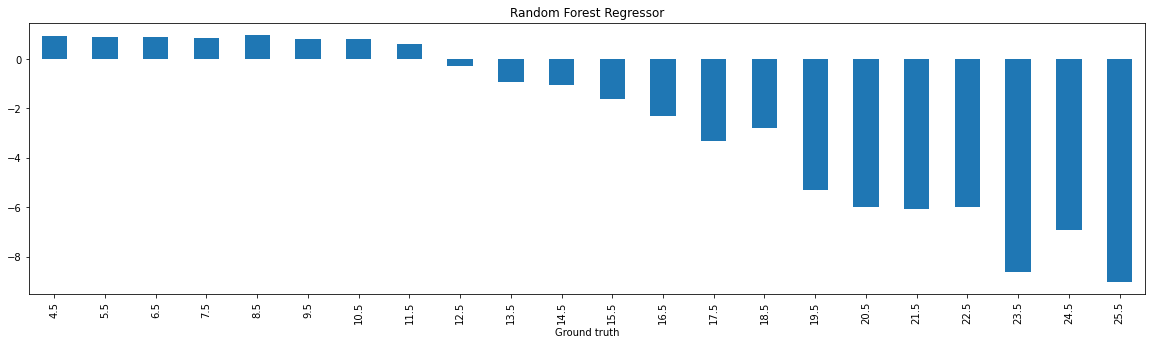

In [32]:
prediction_error(b_test, model_5.predict(A_test), "Random Forest Regressor")

### 11.1 Feature Importance and Selection
Observation:
- Before data cleaning, usually only the 4 weight attributes would have importance scores above 5%.
- After data cleaning, there are usually 7 attributes that have importance scores above 5%. Only 'Sex' is always under 5%.
- Assumption - data cleaning made unimportant attributes more important, as they became cleaner.
- Total feature importance valuse ≈ 0.977.

In [33]:
selector = RandomForestRegressor(
    n_estimators=500, max_samples=0.4, bootstrap=True, 
    max_features=6, random_state = 47).fit(A_train, b_train)

df = pd.DataFrame([A.columns, selector.feature_importances_]).T
df.columns = ['feature', 'importance']
df.sort_values("importance", ascending=False)

,feature,importance
7,ShellWeight,0.414393
5,ShuckedWeight,0.148851
4,WholeWeight,0.109371
3,Height,0.088952
6,VisceraWeight,0.088343
2,Diameter,0.071157
1,Length,0.056419
0,Sex,0.022515


### 11.2 Dimension Reduction and Comparison
- After dropping 1 attribute, the RMSE did increase a bit but not by much, from RMSE≈2.19 to RMSE≈2.20.
- After dropping 1 attribute, both training and testing scores decreased a bit too.
- As we only dropped 1 dimension, it's hard to say if it's worth doing it. However, if we reduce the dimensions drastically and the performance only drops by a little bit, then it is worth doing it.
- In both prediction_error barplots, we can see large ring values tend to have large average errors.
- According to the boxplot of 'age' in section 9.2, the main values of 'age' are in the range of 10 to 13. When the values are above 20, they are most likely to be outliers, which means the values are either not normal or rare in the reality, or there are not enough recorded observations in that range of values.

In [34]:
A_train_red = A_train.drop(columns = ['Sex'])
A_test_red = A_test.drop(columns = ['Sex'])

In [35]:
rfr = RandomForestRegressor(n_estimators=500, random_state=48)

param_6 = {
        'max_features': [4, 5, 6, 7],
        'max_samples': [0.4, 0.6, 0.8, 1],
} 
model_6 = GridSearchCV(rfr, param_6, cv = 3, n_jobs = -1)
model_6.fit(A_train_red, b_train.values.ravel())
print ('Best Hyperparameter Combination: {}\n'.format(model_6.best_params_))
model_6.score(A_train_red, b_train)

Best Hyperparameter Combination: {'max_features': 5, 'max_samples': 0.4}



0.7974087860262133

In [36]:
model_6.score(A_test_red, b_test)

0.5891870313600855

2.2038667731951516


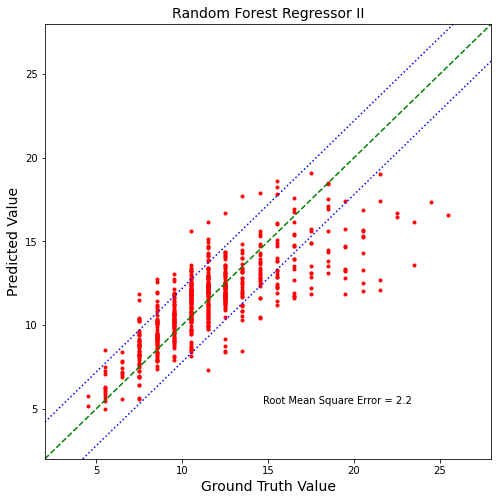

In [37]:
rms6 = plot_predictions_round(b_test, model_6.predict(A_test_red), "Random Forest Regressor II")
print(rms6)

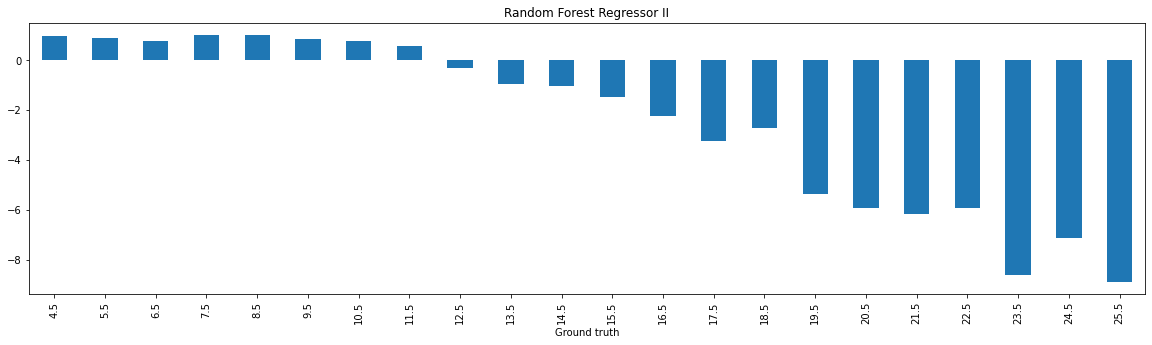

In [38]:
prediction_error(b_test, model_6.predict(A_test_red), "Random Forest Regressor II")

<a id='12'></a>
## 12. Bagging Regressor
- We used GridSearch to tune the SVR before we implemented it in the Bagging Regressor.
- We had overfitting problem in Random Forest Reressor above, but both training and testing scores are similarly low here. The possible reason is SVR are affected by the outliers in the dataset.

In [249]:
svr = SVR()

param_7 = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 10, 50, 100],
    'tol': [1e-3, 1e-4, 1e-5]
}

model_7 = GridSearchCV(svr, param_7, cv=3, n_jobs=-1)
model_7.fit(A_train, b_train.values.ravel())
print ('Best Hyperparameter Combination: {}\n'.format(model_7.best_params_))
model_7.score(A_train, b_train)

Best Hyperparameter Combination: {'C': 100, 'kernel': 'rbf', 'tol': 0.001}



0.5846369921761421

In [279]:
base = SVR(C=100)
model_8 = BaggingRegressor(base_estimator=base,
    n_estimators=500, bootstrap=True, max_samples=0.4,
    max_features=6, random_state = 47, n_jobs=-1).fit(A_train, b_train)
model_8.score(A_train, b_train)

0.5600120807383921

In [286]:
TS8 = model_8.score(A_test, b_test)
print(TS8)

0.5583367079957287


2.2787040204422233


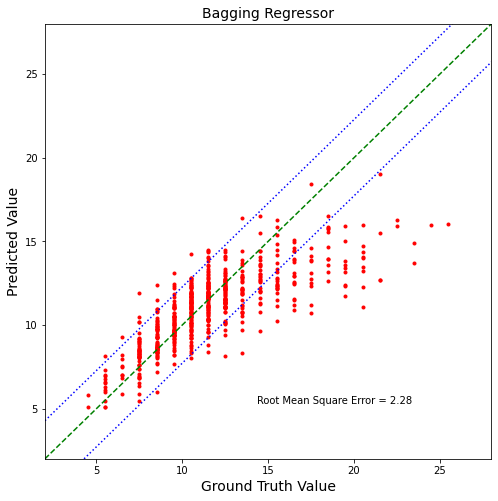

In [281]:
rms8 = plot_predictions_round(b_test, model_8.predict(A_test), "Bagging Regressor")
print(rms8)

<a id='13'></a>
## 13. Conclusion of Project 2
- Random Forest Regressor performs slightly better than Bagging Regressor here by a slightly lower RMSE and a slightly higher testing score.
- However, overall both regressor don't have good prediction results. The possible reason is due to multicollinearity or due  to outliers in this dataset.

In [287]:
regressors = pd.DataFrame({
    'Model' : ['Random Forest Regressor', 'Bagging Regressor'],
    'RMSE' : [rms5, rms8],
    'Testing Score' : [TS5, TS8]
})

regressors.sort_values(by = 'RMSE', ascending = True)

,Model,RMSE,Testing Score
0,Random Forest Regressor,2.193696,0.592801
1,Bagging Regressor,2.278704,0.558337
